## Exploring humanitarian needs in COVID vaccine distribution: Spotlight on gendered vulnerability

This notebook explores the relationship between gendered vulnerabilities to COVID and COVID vaccine distribution in countries of humanitarian interest. In understanding gendered vulnerabilities, we are largely relying on the data compiled as part of a report on ["Understanding Women’s and Girls’ Vulnerabilities to the COVID-19 Pandemic"](https://data2x.org/wp-content/uploads/2020/11/COVID-19-Vulnerability-Paper_FINAL.pdf) (Buvinic, Noe, and Swanson; 2020) from [data2x](https://data2x.org/) and [Open Data Watch](https://opendatawatch.com/) (ODW). We have two datasets on vaccine distribution, both accessed via HDX: [vaccine doses distributed per 100 people](https://data.humdata.org/dataset/covid-19-vaccinations#) and [vaccine forecasts and deliveries in HRP countries](https://data.humdata.org/dataset/covid-19-vaccine-doses-in-hrp-countries). 

This work hopes to contribute to the conversation on equitable vaccine distribution around the world.

In [29]:
import pandas as pd
import seaborn as sns
import os
import numpy as np
import matplotlib.pyplot as plt
import locale
from locale import atof
#import geopandas as gpd

In [78]:
df_vac_hrp = pd.read_csv('data/ocha-doses.csv', thousands=',')
df_vac_hrp = df_vac_hrp.drop([0]).reset_index()

# Need to convert data types
locale.setlocale(locale.LC_NUMERIC, '')
df_vac_hrp.iloc[:, 4:12] = df_vac_hrp.iloc[:, 4:12].astype(str).applymap(atof)
df_vac_hrp.iloc[:,12] = df_vac_hrp.iloc[:,12].str.rstrip('%').astype('float') / 100.0

df_vac_owid = pd.read_csv('data/owid-data.csv')
df_vac_owid = df_vac_owid.drop([0]).reset_index()
df_gen = pd.read_excel('data/EDITED-COVID-19-Gender-Vulnerability-Data-Dashboard-by-ODW.xlsx', sheet_name=1, engine='openpyxl', header=2)

The datasets from Buvinic, Noe, and Swanson (2020) compiles the following composite womens' vulnerability indicators: 

- Women's health
- Economic wellbeing
- Human capital

All indicators are rescaled to the (0,1) interval, with 1 corresponding to the highest indicator score and 0 being the lowest. The authors also calculate a data availability index for each of the above indicators, which measures the proportion of data available for calculating the desired indicator. 

The dataset also includes composite indicators for both the three vulnerability areas and for data availability.

In [5]:
df_gen_in = df_gen.iloc[:, np.r_[0, 16:28]]
df_gen_in.columns = ['ISO3','I_WH', 'DA_WH', 'I_EW', 'DA_EW', 'I_HC', 'DA_HC', 'I_C', 'DA_C', 'NA', 'IV', 'DV', 'HI_COV']
df_gen_in = df_gen_in.dropna(axis='index', thresh=12) # Drop rows with at least 2 NA values - just takes out the bottom two rows
df_gen_in = df_gen_in.dropna(axis='columns')

Of the three vulnerability indicators, the 75 countries score lowest on average in Human Capital (0.45) and highest on average in Women's health (0.62). Average data availability is poorest for the Economic Wellbeing indicator (0.51). The Women's Health indicator has the most data available across the board, with an average of 0.71. 

In [6]:
df_gen_in.describe()

,I_WH,DA_WH,I_EW,DA_EW,I_HC,DA_HC,I_C,DA_C,IV,DV,HI_COV
count,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000
mean,0.622482,0.705185,0.500317,0.505000,0.454232,0.553333,0.541328,0.624727,1.013333,0.960000,0.253333
std,0.103409,0.261852,0.181088,0.261912,0.203332,0.264462,0.128295,0.176279,1.437841,0.978692,0.437849
min,0.403097,0.333333,0.117328,0.125000,0.000000,0.000000,0.263994,0.205537,0.000000,0.000000,0.000000
25%,0.550265,0.444444,0.362642,0.250000,0.308584,0.333333,0.458223,0.518188,0.000000,0.000000,0.000000
50%,0.606655,0.777778,0.547496,0.500000,0.483130,0.666667,0.539443,0.677051,0.000000,1.000000,0.000000
75%,0.696259,0.888889,0.634407,0.750000,0.577388,0.833333,0.645473,0.745678,2.000000,2.000000,0.500000
max,0.816004,1.000000,0.900577,1.000000,0.873374,1.000000,0.792979,0.885555,4.000000,3.000000,1.000000


The following countries are in the lowest quartile for the composite indicator. We could consider these countries as the ones where women are most vulnerable to impacts of COVID-19, and so perhaps the ones where humanitarian efforts to distribute the COVID vaccine should be to some extent prioritized (acknowledging that this isn't the only relevant prioritization factor). However, it is interesting to note that none of these countries are classified as having a high COVID impact.

In [7]:
print(df_gen_in[df_gen_in.I_C <=0.458223][['ISO3', 'HI_COV']])
priority = df_gen_in[df_gen_in.I_C <=0.458223]['ISO3']

   ISO3  HI_COV
0   AFG     0.0
2   AGO     0.0
4   BEN     0.0
12  CAF     0.0
13  TCD     0.0
15  COD     0.0
16  COG     0.0
21  ERI     0.0
26  GIN     0.0
27  GNB     0.0
37  MWI     0.0
38  MLI     0.0
39  MRT     0.0
47  NER     0.0
57  SOM     0.0
58  SSD     0.0
64  TZA     0.0
68  UGA     0.0
74  ZWE     0.0


The charts below indicate the overall distribution of values and relationship between data availability and performance on each of the vulnerability indicators. We don't see a particularly strong relationship in any case. The Women's Health indicator is slightly negatively related to data availability in women's health. All other indicators show a slight positive relationship between indicator performance in data availability. 

Troublingly, these charts also highlight that countries with a high COVID case rate tend to both have poor data availability and poor indicator performance. Places where women are the most vulnerable to COVID and where there is little data availability, in many cases are struggling the most with COVID outbreaks. 

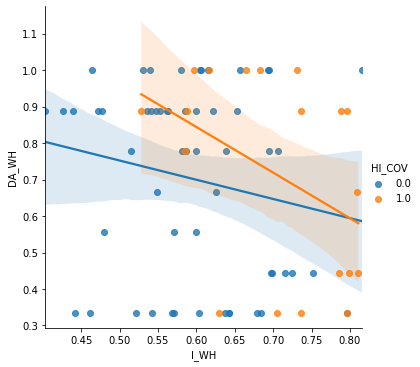

In [6]:
sns.lmplot(data=df_gen_in, x="I_WH", y="DA_WH", hue='HI_COV')

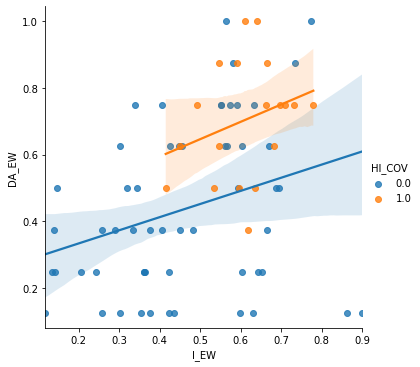

In [7]:
sns.lmplot(data=df_gen_in, x="I_EW", y="DA_EW", hue='HI_COV')

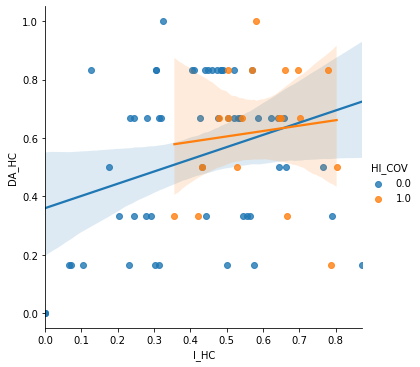

In [8]:
sns.lmplot(data=df_gen_in, x="I_HC", y="DA_HC", hue='HI_COV')

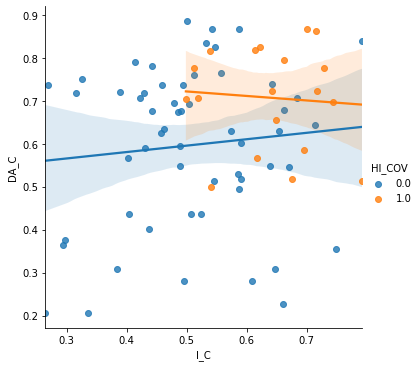

In [9]:
sns.lmplot(data=df_gen_in, x="I_C", y="DA_C", hue='HI_COV')

With these results in mind, let's take a look at places where COVID vaccines are currently, or are planned to be, distributed.

Have any of our 'priority' countries received any vaccine doses? Afghanistan, CRD, Mali, and Zimbabwe have received doses, each for far approximately enough to cover between 1-2% of their poulations. 

In [94]:
df_vac_hrp['Pop_covered'] = df_vac_hrp['COVAX Forecast Total'] / df_vac_hrp['Population (UNDESA)']
df_vac_hrp_pri = df_vac_hrp[df_vac_hrp.ISO3.isin(priority)]
df_vac_hrp_pri[['Country','ISO3','Total Delivered', 'Population Covered (One Dose)']]

,Country,ISO3,Total Delivered,Population Covered (One Dose)
0,Afghanistan,AFG,500000.0,0.0128
3,CAR,CAF,0.0,0.0000
4,Chad,TCD,0.0,0.0000
6,DRC,COD,1700000.0,0.0190
11,Mali,MLI,396000.0,0.0196
14,Niger,NER,0.0,0.0000
18,Somalia,SOM,0.0,0.0000
19,South Sudan,SSD,0.0,0.0000
25,Zimbabwe,ZWE,200000.0,0.0135


How many doses are projected to be delivered to each of these priority countries? How much of their population will this cover?

Looks like a steady ~6.5% of each of these countries' populations will be covered by COVAX vaccine deliveries. This is mostly consistent with the rest of the HRP countries.

<AxesSubplot:xlabel='ISO3', ylabel='Pop_covered'>

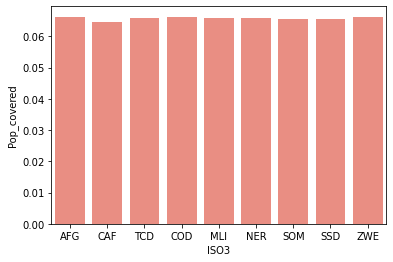

In [100]:
sns.barplot(x="ISO3", y="Pop_covered", data=df_vac_hrp_pri, color="salmon")

<AxesSubplot:xlabel='ISO3', ylabel='Pop_covered'>

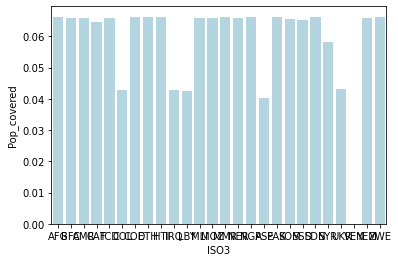

In [102]:
sns.barplot(x="ISO3", y="Pop_covered", data=df_vac_hrp, color='lightblue')

TO DO: Look into the available data from OWID on vaccine rollout. Of these 'priority countries', it looks like only Angola and Zimbabwe are included. 

In [89]:
df_vac_owid_pri = df_vac_owid[df_vac_owid.iso_code.isin(priority)]

In [90]:
df_vac_owid_pri

,index,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
127,128,Angola,AGO,2021-03-05,0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN
128,129,Angola,AGO,2021-03-06,NaN,NaN,NaN,NaN,2056,NaN,NaN,NaN,63.0
129,130,Angola,AGO,2021-03-07,NaN,NaN,NaN,NaN,2056,NaN,NaN,NaN,63.0
130,131,Angola,AGO,2021-03-08,6169,6169.0,NaN,NaN,2056,0.02,0.02,NaN,63.0
6114,6115,Zimbabwe,ZWE,2021-02-18,0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN
6115,6116,Zimbabwe,ZWE,2021-02-19,NaN,NaN,NaN,NaN,328,NaN,NaN,NaN,22.0
6116,6117,Zimbabwe,ZWE,2021-02-20,NaN,NaN,NaN,NaN,328,NaN,NaN,NaN,22.0
6117,6118,Zimbabwe,ZWE,2021-02-21,NaN,NaN,NaN,NaN,328,NaN,NaN,NaN,22.0
6118,6119,Zimbabwe,ZWE,2021-02-22,1314,1314.0,NaN,NaN,328,0.01,0.01,NaN,22.0
6119,6120,Zimbabwe,ZWE,2021-02-23,4041,4041.0,NaN,2727.0,808,0.03,0.03,NaN,54.0


In [ ]:
# Helpers to format and locate ticks for dates
from matplotlib.dates import DateFormatter, DayLocator

# Set the x-axis to do major ticks on the days and label them like '07/20'
ax.xaxis.set_major_locator(DayLocator())
ax.xaxis.set_major_formatter(DateFormatter('%m/%d'))